In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm

from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

In [5]:
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestRegressor as RF, GradientBoostingRegressor as GBR

# 8.1 Classification Tree
### Load data

In [6]:
Carseats = load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
# An array of Sales >0 or not
High = np.where(Carseats.Sales > 8, "Yes", "No")

### Train with all data in training set

In [15]:
# Convert data frame for training (Qualitative parameter conversion)
model = MS(Carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(Carseats)
D

,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes]
0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0
2,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0
3,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0
396,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0
397,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0


In [18]:
# Convert to np.ndarray format
feature_names = list(D.columns)
X = np.asarray(D)
X

array([[138.,  73.,  11., ...,  17.,   1.,   1.],
       [111.,  48.,  16., ...,  10.,   1.,   1.],
       [113.,  35.,  10., ...,  12.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,  18.,   1.,   1.],
       [100.,  79.,   7., ...,  12.,   1.,   1.],
       [134.,  37.,   0., ...,  16.,   1.,   1.]])

In [19]:
# DecisionTreeClassifier
# @params
# max_depth: max_depth of a tree
# min_samples_split: minimum number of observations in a node to be eligible for splitting, not used here
# criterion: Gini or cross-entropy as the split criterio
# random_state: for reproducibility; ties in the split criterion are broken at random
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)
clf.fit(X, High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Metric: accuracy score

In [22]:
#in-sample accuracy_score = correct prediction/all prediction
accuracy_score(High , clf.predict(X))

0.79

### Metric: Log loss

In [23]:
# The labels in y_pred are assumed to be ordered alphabetically
# In this case:
# 1st column is for "No"
# 2nd column is for "Yes"
clf.predict_proba(X)

array([[0.81696429, 0.18303571],
       [0.03921569, 0.96078431],
       [0.7       , 0.3       ],
       [0.81696429, 0.18303571],
       [0.81696429, 0.18303571],
       [0.19444444, 0.80555556],
       [0.81696429, 0.18303571],
       [0.03921569, 0.96078431],
       [0.81696429, 0.18303571],
       [0.81696429, 0.18303571],
       [0.81696429, 0.18303571],
       [0.03921569, 0.96078431],
       [0.81696429, 0.18303571],
       [0.03921569, 0.96078431],
       [0.03921569, 0.96078431],
       [0.81696429, 0.18303571],
       [0.35294118, 0.64705882],
       [0.03921569, 0.96078431],
       [0.03921569, 0.96078431],
       [0.44444444, 0.55555556],
       [0.81696429, 0.18303571],
       [0.03921569, 0.96078431],
       [0.81696429, 0.18303571],
       [0.81696429, 0.18303571],
       [0.44444444, 0.55555556],
       [0.35294118, 0.64705882],
       [0.03921569, 0.96078431],
       [0.81696429, 0.18303571],
       [0.81696429, 0.18303571],
       [0.44444444, 0.55555556],
       [0.

In [28]:
log_loss(High, clf.predict_proba(X))

0.4710647062649358

In [35]:
#log_loss
# @param
# y_true: array-like or label indicator matrix

# y_pred: array-like of float, shape = (n_samples, n_classes) or (n_samples,)
#.        The labels in y_pred are assumed to be ordered alphabetically
log_loss(High, clf.predict_proba(X)[:, 1])

0.4710647062649359

In [39]:
# The same as `log_loss(High, clf.predict_proba(X))`
resid_dev = np.sum(log_loss(High , clf.predict_proba(X)))
resid_dev

0.4710647062649358

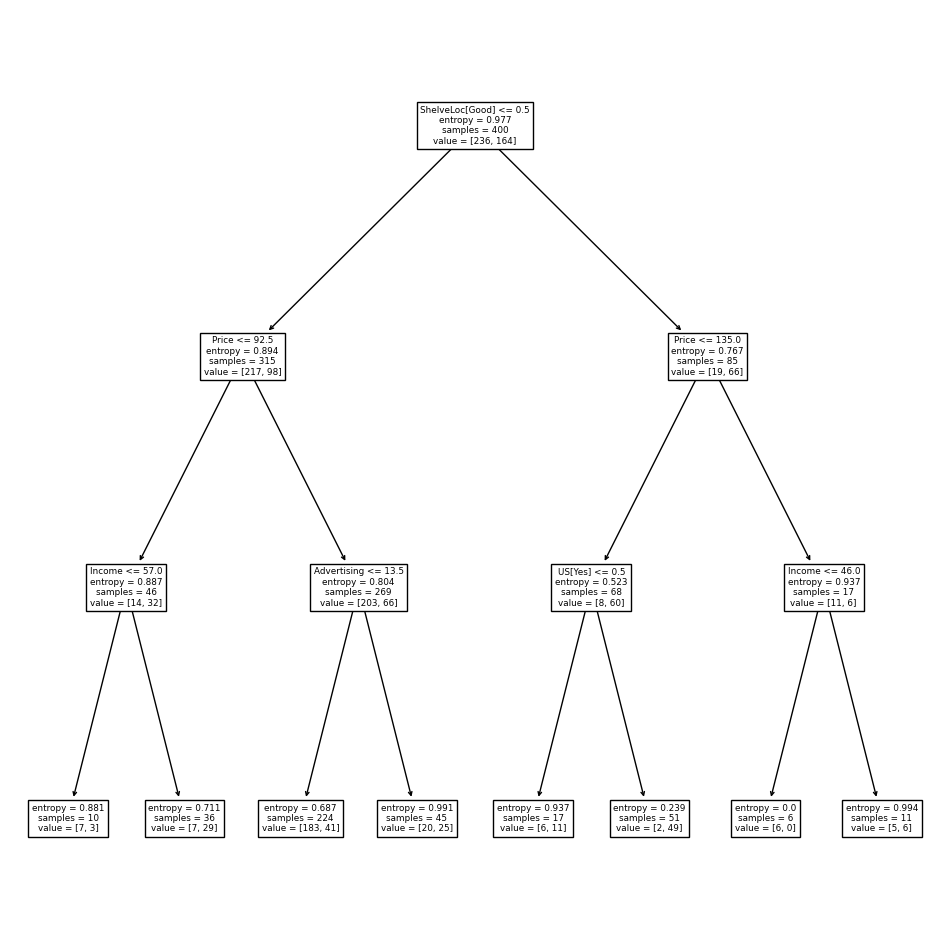

In [40]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names ,
          ax=ax);

In [42]:
# weights are different class in this region, alphabetic order
print(export_text(clf ,
                  feature_names=feature_names ,
                  show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



## 8.1.2 Cross validation

In [52]:
# Use sklearn.model_selection
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
validation

ShuffleSplit(n_splits=1, random_state=0, test_size=200, train_size=None)

In [48]:
results = skm.cross_validate(clf ,
                             D,
                             High ,
                             cv=validation)
print(results)
results['test_score']

{'fit_time': array([0.00308776]), 'score_time': array([0.0017221]), 'test_score': array([0.685])}


array([0.685])

### Conlcusion of CV
- Estimated accuracy score of CV is 68.5%

## 8.1.3 Compare pruned and unpruned version

### Unpruned 

In [50]:
X_train, X_test , High_train , High_test = skm.train_test_split(X,
                                                                  High ,
                                                                  test_size=0.5,
                                                                  random_state=0)

In [51]:
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train , High_train)
accuracy_score(High_test , clf.predict(X_test))

0.735

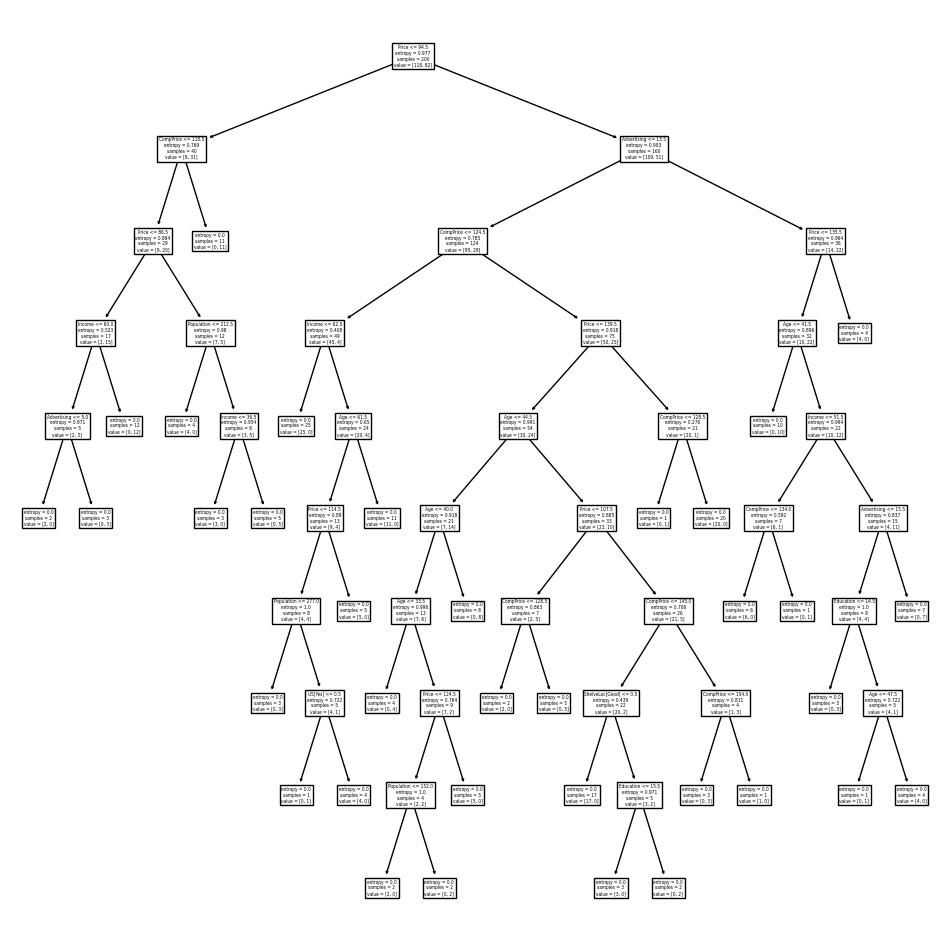

In [61]:
ax = subplots(figsize=(12, 12))[1]
plot_tree(clf,
          feature_names=feature_names ,
          ax=ax);

In [73]:
# Unpruned tree
# print(f" Unpruned tree has {clf.tree_.n_leaves} leave nodes")
print(f"""Pruned tree has {clf.tree_.n_leaves} leave nodes. It results in the lowest cross-validation error 
rate, with an accuracy of {100 * accuracy_score(High_test , clf.predict(X_test)):.2f}%""")

Pruned tree has 35 leave nodes. It results in the lowest cross-validation error 
rate, with an accuracy of 73.50%


In [53]:
# Use cost_complexity_pruning_path() method to extract cost-complexity values
# Return:
# ccp_alphas: ndarray: Effective alphas of subtree during pruning.
# impurities: ndarray: Sum of the impurities of the subtree leaves for the corresponding alpha value in ccp_alphas.
ccp_path = clf.cost_complexity_pruning_path(X_train , High_train)
kfold = skm.KFold(10, random_state=1, shuffle=True)

### Pruned tree
- Using Grid Search for model selection

In [54]:
grid = skm.GridSearchCV(clf ,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True ,
                        cv=kfold ,
                        scoring='accuracy')
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.01622556, 0.0171946 , 0.0180482 , 0.0180482 ,
       0.01991688, 0.02012073, 0.02070855, 0.02193427, 0.0219518 ,
       0.02220877, 0.02274806, 0.02417233, 0.02588672, 0.02714959,
       0.02735525, 0.02900052, 0.02906078, 0.03209543, 0.04499252,
       0.06236632, 0.10024835])},
             scoring='accuracy')

In [55]:
grid.fit(X_train , High_train)
grid.best_score_

0.685

In [66]:
best_ = grid.best_estimator_
best_

DecisionTreeClassifier(ccp_alpha=0.018048202372184057, criterion='entropy',
                       random_state=0)

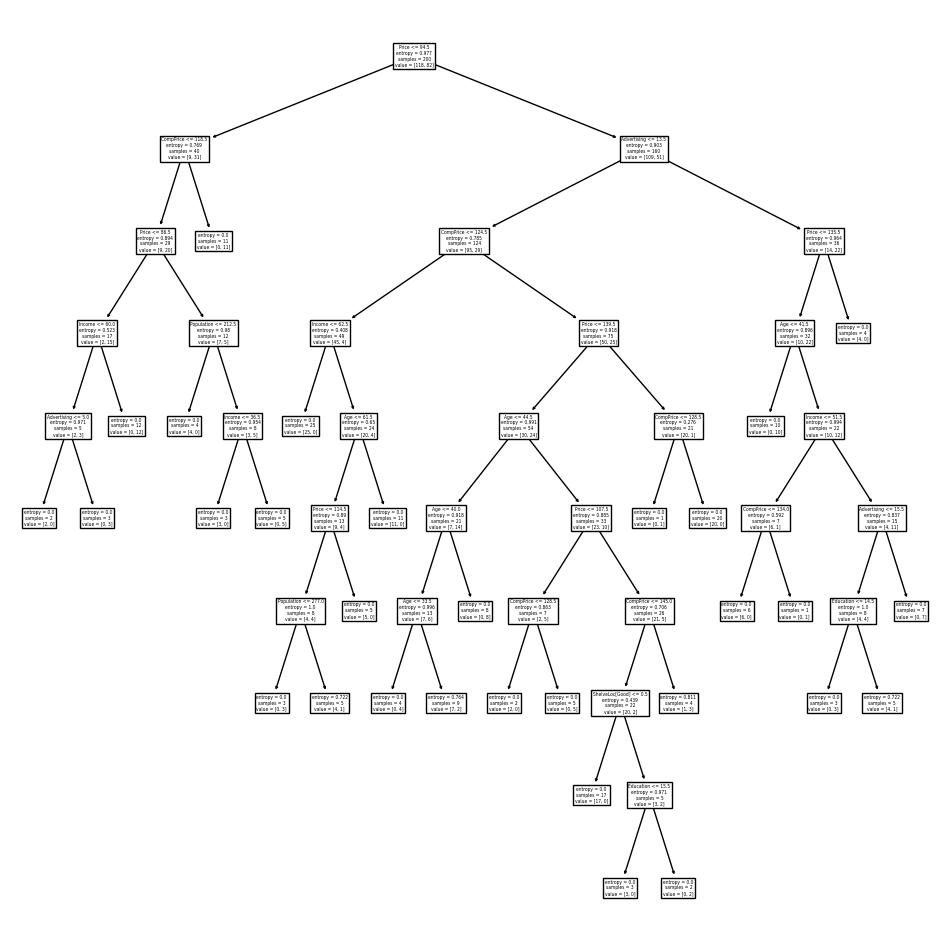

In [57]:
ax = subplots(figsize=(12, 12))[1]

plot_tree(best_ ,
          feature_names=feature_names ,
          ax=ax);

In [78]:
# Get the number of leaves, it is still a bushy tree after pruning
# The accuracy score is the same as what CV estimated
best_.tree_.n_leaves
print(f"""Pruned tree has {best_.tree_.n_leaves} leave nodes. It results in the lowest cross-validation error 
      rate, with an accuracy of {100 * grid.best_score_:.2f}%""")

Pruned tree has 30 leave nodes. It results in the lowest cross-validation error 
      rate, with an accuracy of 68.50%


### Pruned tree on test set


In [75]:
accuracy_score(High_test , best_.predict(X_test))

0.72

In [76]:
confusion = confusion_table(best_.predict(X_test), High_test)
confusion

Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50


- The result would change by how the data set is shuffled (random seed)
- even though cross-validation gives an unbiased approach to model selection, it does have variance

# 8.2 Regression Trees

## 8.2.1 Boston
### Load data
- Prediction: 'medv'

In [81]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)

D = model.fit_transform(Boston)
feature_names = list(D.columns)

X = np.asarray(D)
D

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [108]:
# Use 30% of the data as test set
(X_train , X_test , y_train , y_test) = skm.train_test_split(X,
                                                             Boston['medv'],
                                                             test_size=0.3,
                                                             random_state=0)

### Unpruned version (max_depth = 3)

In [96]:
reg = DTR(max_depth=3)
reg.fit(X_train , y_train)
MSE = np.mean((y_test - reg.predict(X_test))**2)
print(f"Unpruned version has MSE={MSE:.2f}, STD={np.sqrt(MSE):.2f}")

Unpruned version has MSE=28.07, STD=5.30


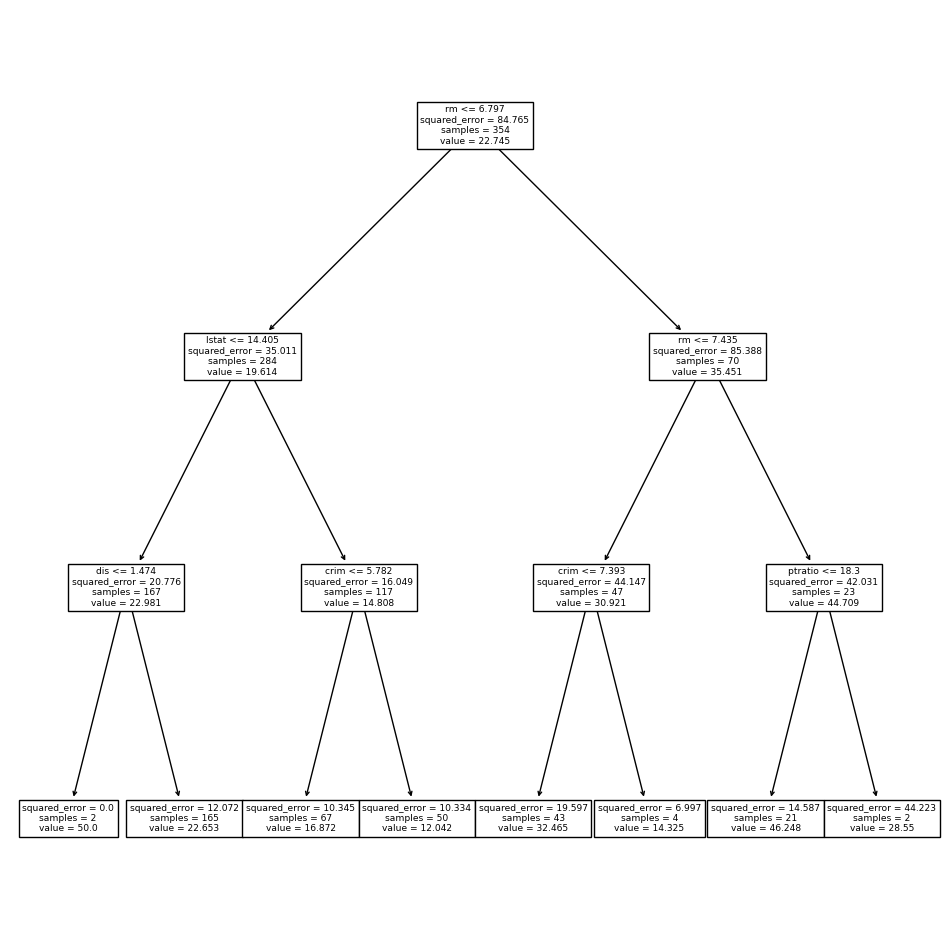

In [101]:
ax = subplots(figsize=(12,12))[1]
plot_tree(reg ,
          feature_names=feature_names ,
          ax=ax);

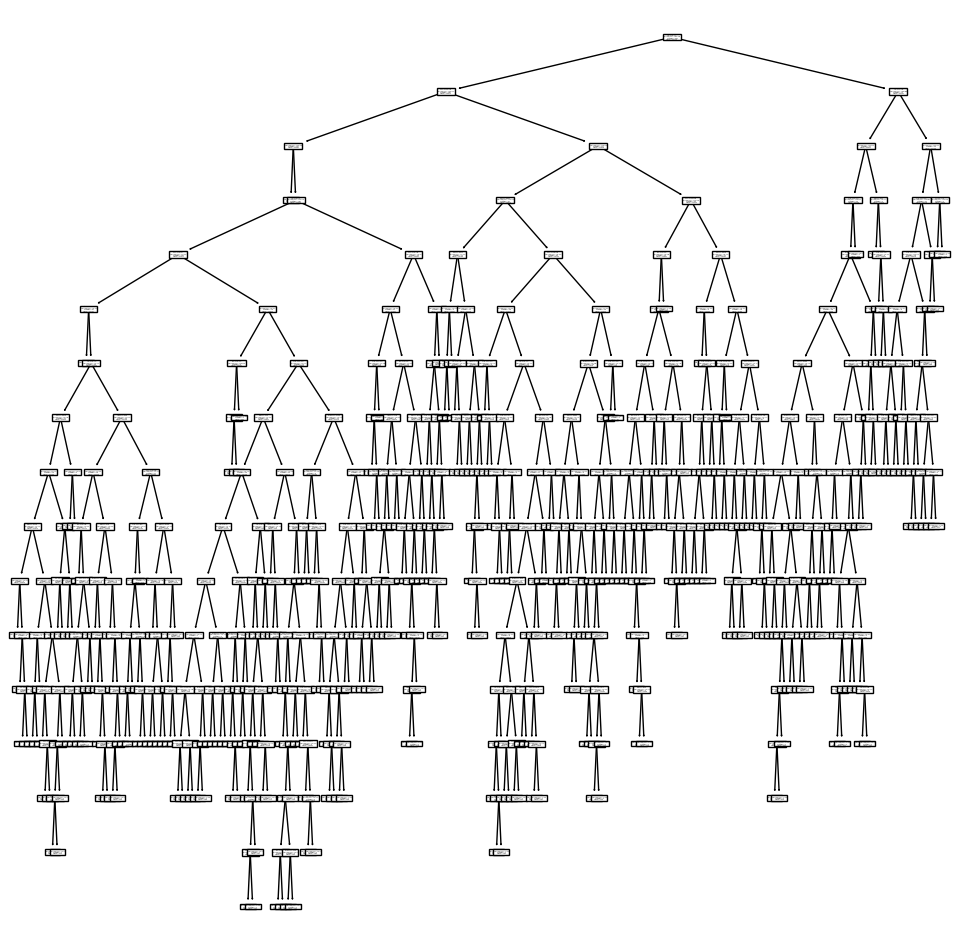

In [85]:
# Without limit the max depth
reg = DTR()
reg.fit(X_train , y_train)

ax = subplots(figsize=(12,12))[1]
plot_tree(reg ,
          feature_names=feature_names ,
          ax=ax);

### `cost_complexity_pruning_path()`
- It will search for $\alpha$ and store the path in `.ccp_alphas`

In [88]:
# Return:
# ccp_alphas: ndarray: Effective alphas of subtree during pruning.
# impurities: ndarray: Sum of the impurities of the subtree leaves for the corresponding alpha value in ccp_alphas.
ccp_path = reg.cost_complexity_pruning_path(X_train , y_train)
ccp_path

{'ccp_alphas': array([ 0.        ,  1.6156522 ,  1.88662474,  3.40178969,  4.17448592,
         8.29259286, 12.98252736, 39.79182618]),
 'impurities': array([12.61901452, 14.23466673, 16.12129147, 19.52308115, 23.69756707,
        31.99015993, 44.97268729, 84.76451347])}

In [89]:
kfold = skm.KFold(5, shuffle=True , random_state =10)
grid = skm.GridSearchCV(reg, 
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True, cv=kfold , scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [98]:
best_ = grid.best_estimator_
MSE = np.mean((y_test - best_.predict(X_test))**2)
print(f"Pruned version has MSE={MSE:.2f}, STD={np.sqrt(MSE):.2f}")

Pruned version has MSE=28.07, STD=5.30


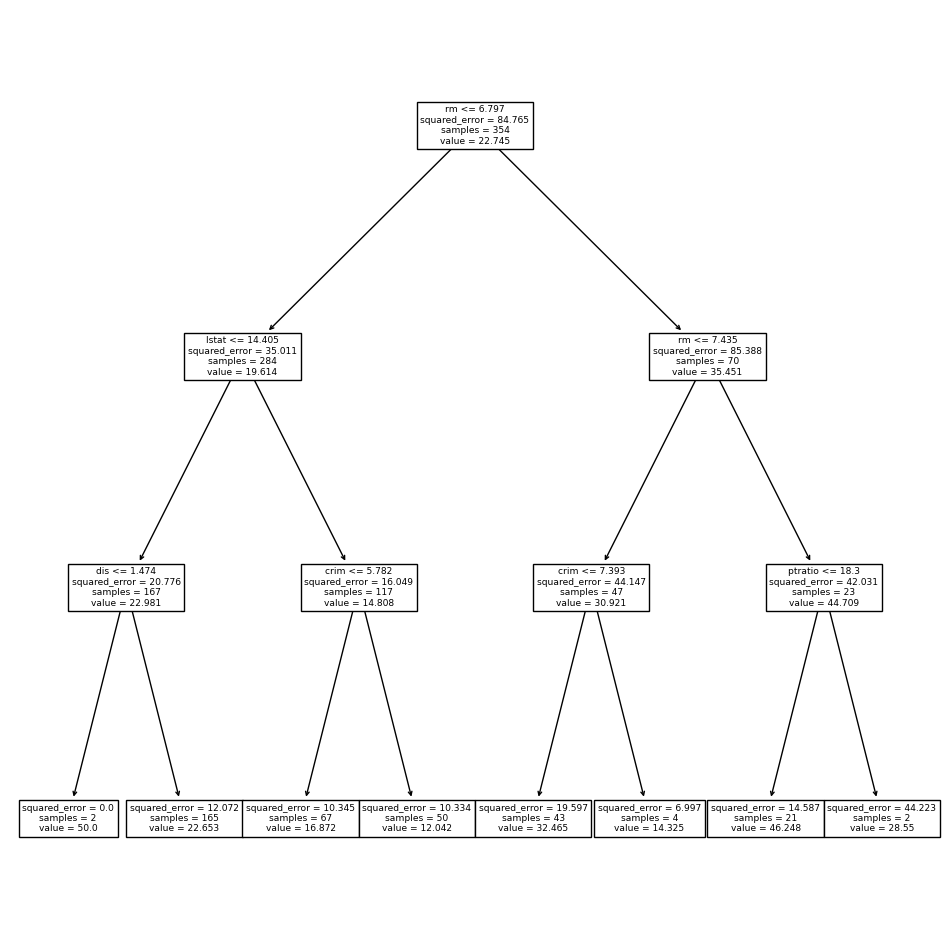

In [99]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_ ,
          feature_names=feature_names ,
          ax=ax);

### Conclusion
- Pruning does not affect the performance of this tree (with limit max_depth = 3)

# 8.3 Bagging

## Bagging (m=p)

In [121]:
from sklearn.ensemble import RandomForestRegressor as RF

In [102]:
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train , y_train)

RandomForestRegressor(max_features=12, random_state=0)

In [103]:
y_hat_bag = bag_boston.predict(X_test)
y_hat_bag

array([23.904, 29.922, 21.941, 10.846, 20.526, 20.759, 21.042, 20.357,
       20.207, 19.768,  8.05 , 14.505, 15.046,  9.013, 47.734, 33.645,
       21.027, 34.81 , 26.436, 21.45 , 23.645, 22.561, 19.191, 24.167,
       20.604, 18.097, 18.727, 15.663, 44.02 , 18.598, 14.49 , 16.944,
       20.06 , 20.857, 22.815, 17.19 ,  8.289, 29.803, 14.462, 14.967,
       22.636, 20.891, 22.496, 15.182, 23.626, 22.658, 20.595, 16.449,
       14.567, 25.624, 16.719, 20.122, 20.388, 40.221, 15.311, 20.11 ,
       19.433, 18.583, 23.912, 20.206, 21.186, 21.114, 33.044, 29.239,
       18.187, 27.735, 15.631, 17.917, 17.768, 21.78 , 20.271, 22.728,
       24.367, 31.54 , 28.831,  9.043, 42.916, 21.652, 22.64 , 19.148,
       27.101, 17.826, 23.142, 42.93 , 41.748, 24.139, 23.28 , 15.62 ,
       25.303, 14.944, 18.201, 13.517, 22.423, 30.32 , 21.114, 21.903,
       11.552, 23.184, 15.484, 18.638, 23.837, 19.842, 27.792, 20.993,
       28.361, 20.493,  9.411, 18.781, 21.475, 23.215, 34.472, 12.807,
      

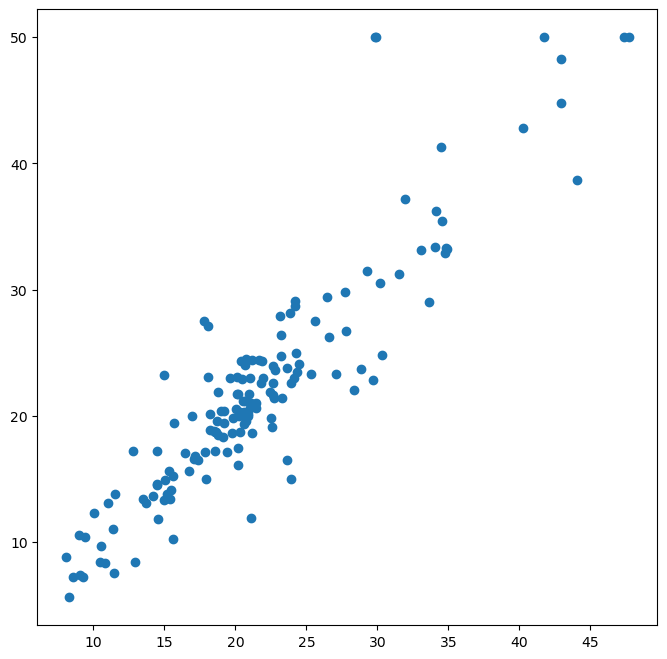

In [104]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(y_hat_bag , y_test)

In [109]:
print(f"Bagging MSE={np.mean((y_test - y_hat_bag)**2)}")

Bagging MSE=14.684333796052627


The test set MSE associated with the bagged regression tree is 14.68, about
half that obtained using an optimally-pruned single tree

We could change the number of trees (**K**) grown from the default of 100 by using the n_estimatorsargument:

In [111]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train , y_train)
y_hat_bag = bag_boston.predict(X_test)
print(f"With n_estimators=500, Bagging MSE={np.mean((y_test - y_hat_bag)**2)}")

With n_estimators=500, Bagging MSE=14.565312103157904


**Result interpretation:**

There is not much change. Bagging and random forests cannot overfit by increasing the number of trees

## Random Forest

- Set max feature used as `6`

In [118]:
RF_boston = RF(max_features=6,
               random_state=0).fit(X_train , y_train)
y_hat_RF = RF_boston.predict(X_test)

print(f"With max 6 features, RF MSE={np.mean((y_test - y_hat_RF)**2):.6f}")

With max 6 features, RF MSE=19.998839


random forests did somewhat worse than bagging in this case. Now we should check feature importance.

### Feature Importance
Extracting the feature_importances_values from the fitted model, we can view the importance of each variable

In [119]:
feature_imp = pd.DataFrame(
    {'importance':RF_boston.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
lstat,0.353808
rm,0.334349
ptratio,0.069519
crim,0.056386
indus,0.053183
dis,0.043762
nox,0.033085
tax,0.025047
age,0.019238
rad,0.005169


# 8.4 Boosting
- Use `sklearn.ensemble.GradientBoostingRegressor()` to fit
- OR `sklearn.ensemble.GradientBoostingClassifier()`

In [120]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [122]:
boost_boston = GBR(n_estimators=5000, learning_rate =0.001, max_depth=3, random_state=0)
boost_boston.fit(X_train , y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

In [124]:
len(boost_boston.train_score_)

5000

In [128]:

boost_boston.train_score_

array([84.62029462, 84.47636406, 84.33272122, ...,  2.5816546 ,
        2.58114409,  2.58076297])

In [129]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx , y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)
test_error 

array([83.63320204, 83.49995557, 83.36699764, ..., 14.48019803,
       14.47970105, 14.47898053])

Text(0.5, 1.0, 'Train error VS test error')

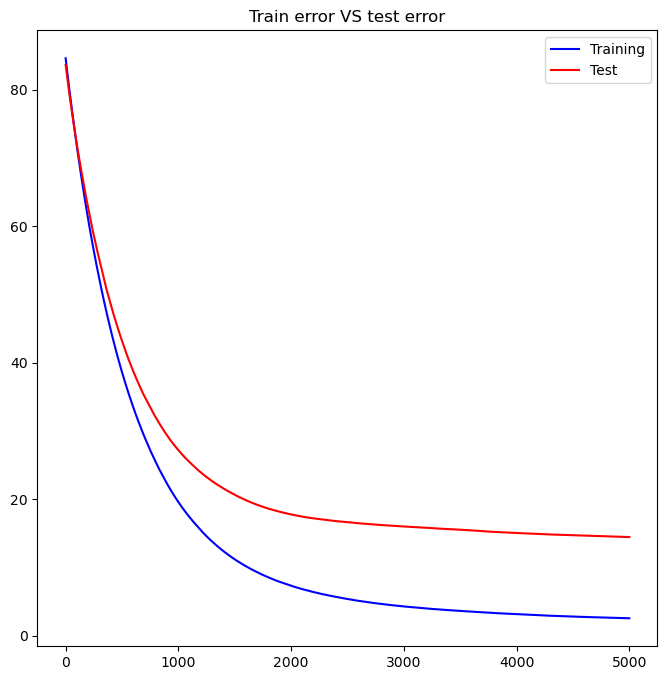

In [133]:
plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx ,
        boost_boston.train_score_ ,
        'b',
        label='Training')
ax.plot(plot_idx ,
        test_error ,
        'r',
        label='Test')
ax.legend();
ax.set_title("Train error VS test error")

y_hat_boost = boost_boston.predict(X_test);
print(f"MSE={np.mean((y_test - y_hat_boost)**2):.4f}")

**result interpretation**
- The test MSE obtained is 14.48, similar to the test MSE for bagging
- we can perform boosting with a different value of the shrinkage parameter $\lambda$ (learning rate)

In [136]:
boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
boost_boston.fit(X_train ,y_train)
y_hat_boost = boost_boston.predict(X_test);
print(f"MSE={np.mean((y_test - y_hat_boost)**2):.4f}")

MSE=14.5015


- Then tuning $\lambda$ might improve the parameter

# 8.5 Bayesian Additive Regression Trees

In [138]:
from ISLP.bart import BART

In [139]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train , y_train)

BART(burnin=5, ndraw=15, random_state=0)

In [141]:
yhat_test = bart_boston.predict(X_test.astype(np.float32))
print(f"MSE={np.mean((y_test - yhat_test)**2):.4f}")

MSE=22.1450


### Check how many times each variable appeared in the collection of tree

In [149]:
print(f"{D.columns}, {len(D.columns)}")

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object'), 12


In [150]:
# variable_inclusion_ gives the an array with shape (n_features, n_draw) 
# it shows the occurance of each feature show in each draw/iteration
bart_boston.variable_inclusion_

array([[27, 20, 19, 21, 27, 37, 27, 24, 29, 23, 22, 35],
       [26, 26, 24, 24, 21, 31, 22, 33, 27, 29, 21, 29],
       [18, 23, 28, 26, 27, 31, 29, 24, 22, 19, 27, 33],
       [26, 32, 21, 23, 23, 28, 23, 25, 21, 30, 20, 30],
       [22, 26, 23, 20, 38, 22, 15, 32, 18, 21, 28, 38],
       [31, 40, 22, 29, 21, 24, 15, 34, 25, 21, 26, 32],
       [25, 31, 24, 25, 29, 39, 26, 27, 17, 21, 16, 35],
       [23, 33, 32, 24, 26, 36, 21, 28, 23, 24, 20, 28],
       [24, 29, 23, 25, 31, 42, 31, 24, 26, 17, 23, 33],
       [30, 34, 25, 22, 28, 20, 26, 20, 25, 22, 18, 32],
       [30, 28, 36, 22, 22, 24, 21, 20, 21, 22, 30, 32],
       [27, 26, 23, 19, 30, 23, 19, 29, 24, 31, 24, 32],
       [32, 24, 30, 10, 20, 30, 24, 34, 27, 26, 32, 23],
       [35, 25, 31, 24, 30, 27, 24, 23, 23, 28, 27, 25],
       [28, 21, 36, 23, 26, 33, 18, 20, 27, 28, 30, 28]])

In [144]:
bart_boston.variable_inclusion_.mean(0)

array([26.93333333, 27.86666667, 26.46666667, 22.46666667, 26.6       ,
       29.8       , 22.73333333, 26.46666667, 23.66666667, 24.13333333,
       24.26666667, 31.        ])

In [153]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),index=D.columns)
var_inclusion

crim       26.933333
zn         27.866667
indus      26.466667
chas       22.466667
nox        26.600000
rm         29.800000
age        22.733333
dis        26.466667
rad        23.666667
tax        24.133333
ptratio    24.266667
lstat      31.000000
dtype: float64

**Tuning B and burn-in rate**
- No significant difference
- I doubt if is the burn-in rate too small, even though it is suggest to be moderate

In [156]:
bart_boston = BART(random_state=0, burnin=30, ndraw=40)
bart_boston.fit(X_train , y_train)
yhat_test = bart_boston.predict(X_test.astype(np.float32))
print(f"MSE={np.mean((y_test - yhat_test)**2):.4f}")

MSE=20.1907


In [157]:
bart_boston = BART(random_state=0, burnin=20, ndraw=100)
bart_boston.fit(X_train , y_train)
yhat_test = bart_boston.predict(X_test.astype(np.float32))
print(f"MSE={np.mean((y_test - yhat_test)**2):.4f}")

MSE=20.3815
